# Classification - Logistic Regression

In [40]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, jaccard_score, accuracy_score, precision_score, recall_score, classification_report

pd.set_option('display.max_rows',None)

pd.set_option('display.max_columns',None)

In [41]:
df = pd.read_csv('data/ChurnData.csv')
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [42]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [43]:
churn_df = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless','churn']].copy()
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [44]:
churn_df.shape

(200, 10)

In [45]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless']].values
X = df.drop("churn", axis=1)
X[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,tollmon,equipmon,cardmon,wiremon,longten,tollten,cardten,voice,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,20.75,0.0,15.25,35.7,42.00,211.45,125.0,1.0,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,0.00,0.0,0.00,0.0,288.80,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,0.00,0.0,0.00,0.0,157.05,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,45.00,50.1,23.25,64.9,239.55,1873.05,880.0,1.0,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,22.00,0.0,23.75,0.0,47.45,166.10,145.0,1.0,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0


In [46]:
y = churn_df['churn'].values
y[0:5]

array([1, 1, 0, 0, 0])

In [47]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673, -0.74922681,
         0.48126577, -0.80905935,  0.06044721,  1.08826163, -0.71940664,
        -0.36132818, -0.55974431,  1.54590766,  1.62368828, -0.88640526,
         1.0944415 ,  1.08347268, -0.88640526, -0.97509593, -0.69987184,
         1.28150384,  1.41630855],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148, -0.23718629,
        -0.84846321, -0.80905935, -0.97385292, -0.56616669, -0.38801572,
        -0.61983235, -0.69284848, -0.64686916, -0.61588176, -0.88640526,
        -0.91370804, -0.92295821, -0.88640526,  0.07226665,  0.03858151,
        -0.60481397, -1.36987221],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148, -0.5565779 ,
        -0.84846321, -0.80905935, -0.97385292, -0.5661

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

In [49]:
print("Training Size: ",X_train.shape,y_train.shape)
print("Testing Size: ",X_test.shape,y_test.shape)

Training Size:  (150, 27) (150,)
Testing Size:  (50, 27) (50,)


In [66]:
LR = LogisticRegression(C=0.05,solver='liblinear')

In [67]:
LR

LogisticRegression(C=0.05, solver='liblinear')

In [68]:
LR.fit(X_train,y_train)

LogisticRegression(C=0.05, solver='liblinear')

In [69]:
Yhat = LR.predict(X_test)

In [70]:
Yhat_prob = LR.predict_proba(X_test)

In [71]:
Yhat[0:5]

array([1, 1, 0, 0, 0])

In [72]:
Yhat_prob[0:5]

array([[0.37558714, 0.62441286],
       [0.20149559, 0.79850441],
       [0.75330155, 0.24669845],
       [0.64664602, 0.35335398],
       [0.67045804, 0.32954196]])

In [73]:
jaccard_score(y_test,Yhat)

np.float64(0.3333333333333333)

In [74]:
# Create the Confusion Matrix
cm = confusion_matrix(y_test, Yhat)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[29 10]
 [ 4  7]]


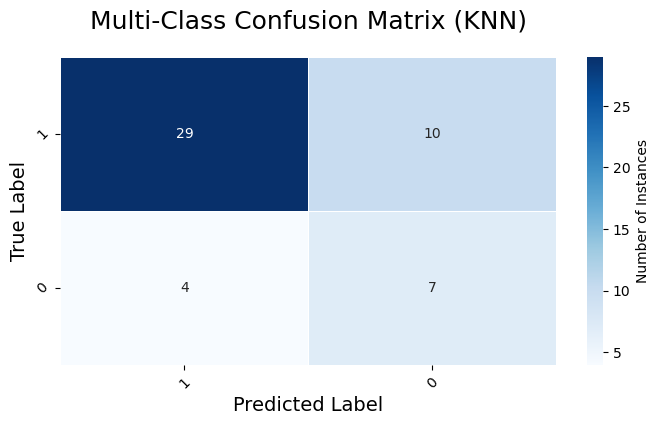

In [75]:
# Create a visually appealing heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(
    cm,
    annot=True,              # Annotate each cell with the numeric value
    fmt='d',                 # Use integer format for the annotations
    cmap='Blues',            # Use a blue color palette
    xticklabels=[1,0],
    yticklabels=[1,0],
    linewidths=.5,           # Add lines to separate the cells
    cbar_kws={'label': 'Number of Instances'} # Add a label to the color bar
)
plt.title('Multi-Class Confusion Matrix (KNN)', fontsize=18, pad=20)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [76]:
# Calculate Precision and Recall
precision = precision_score(y_test, Yhat,average='weighted')
recall = recall_score(y_test, Yhat,average='weighted')
f1_score = accuracy_score(y_test, Yhat)

In [77]:
print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"f1 Score: {f1_score:.2f}")


Precision: 0.78
Recall: 0.72
f1 Score: 0.72


In [62]:
# Generate a comprehensive classification report
print("\nClassification Report:")
print(classification_report(y_test, Yhat))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84        39
           1       0.46      0.55      0.50        11

    accuracy                           0.76        50
   macro avg       0.66      0.68      0.67        50
weighted avg       0.78      0.76      0.77        50



In [63]:
coefficients = LR.coef_[0]

In [64]:
coefficients

array([-0.20740842, -0.22899665, -0.01135065, -0.03766949,  0.15242128,
       -0.26554326,  0.07597184, -0.26050218,  0.07050188, -0.0975108 ,
        0.11279902,  0.08138117,  0.07470459,  0.12658568, -0.08219896,
        0.08716117, -0.03743564,  0.0311606 ,  0.0626703 ,  0.18447684,
       -0.17759474, -0.15638363,  0.17719286, -0.16712944, -0.11873742,
       -0.0140016 ,  0.04714214])

In [65]:
feature_importance = pd.DataFrame({'Feature':churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless']].columns,'Coefficients':coefficients})

ValueError: All arrays must be of the same length

In [ ]:
feature_importance = feature_importance.sort_values('Coefficients',ascending=False)

In [ ]:
print(feature_importance)

    Feature  Coefficients
6     equip      0.239413
4        ed      0.230322
8  wireless      0.189194
3    income     -0.033414
2   address     -0.046485
1       age     -0.222486
7  callcard     -0.246476
5    employ     -0.293840
0    tenure     -0.305008
